# Ames, Iowa - Housing Regression Challenge:

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNetCV, ElasticNet
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test (1).csv')
samp_df = pd.read_csv('sample_sub_reg.csv')

### Datasets:

In [3]:
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


## Number of Rows and Columns per Dataframe: 

- **Train Dataframe:** 2051, 81
- **Test Dataframe:** 879, 80

## Data Types: 
- 
- 
- 

## Correlations:

### Below is Heat-Map illustrating the correlation between columns.

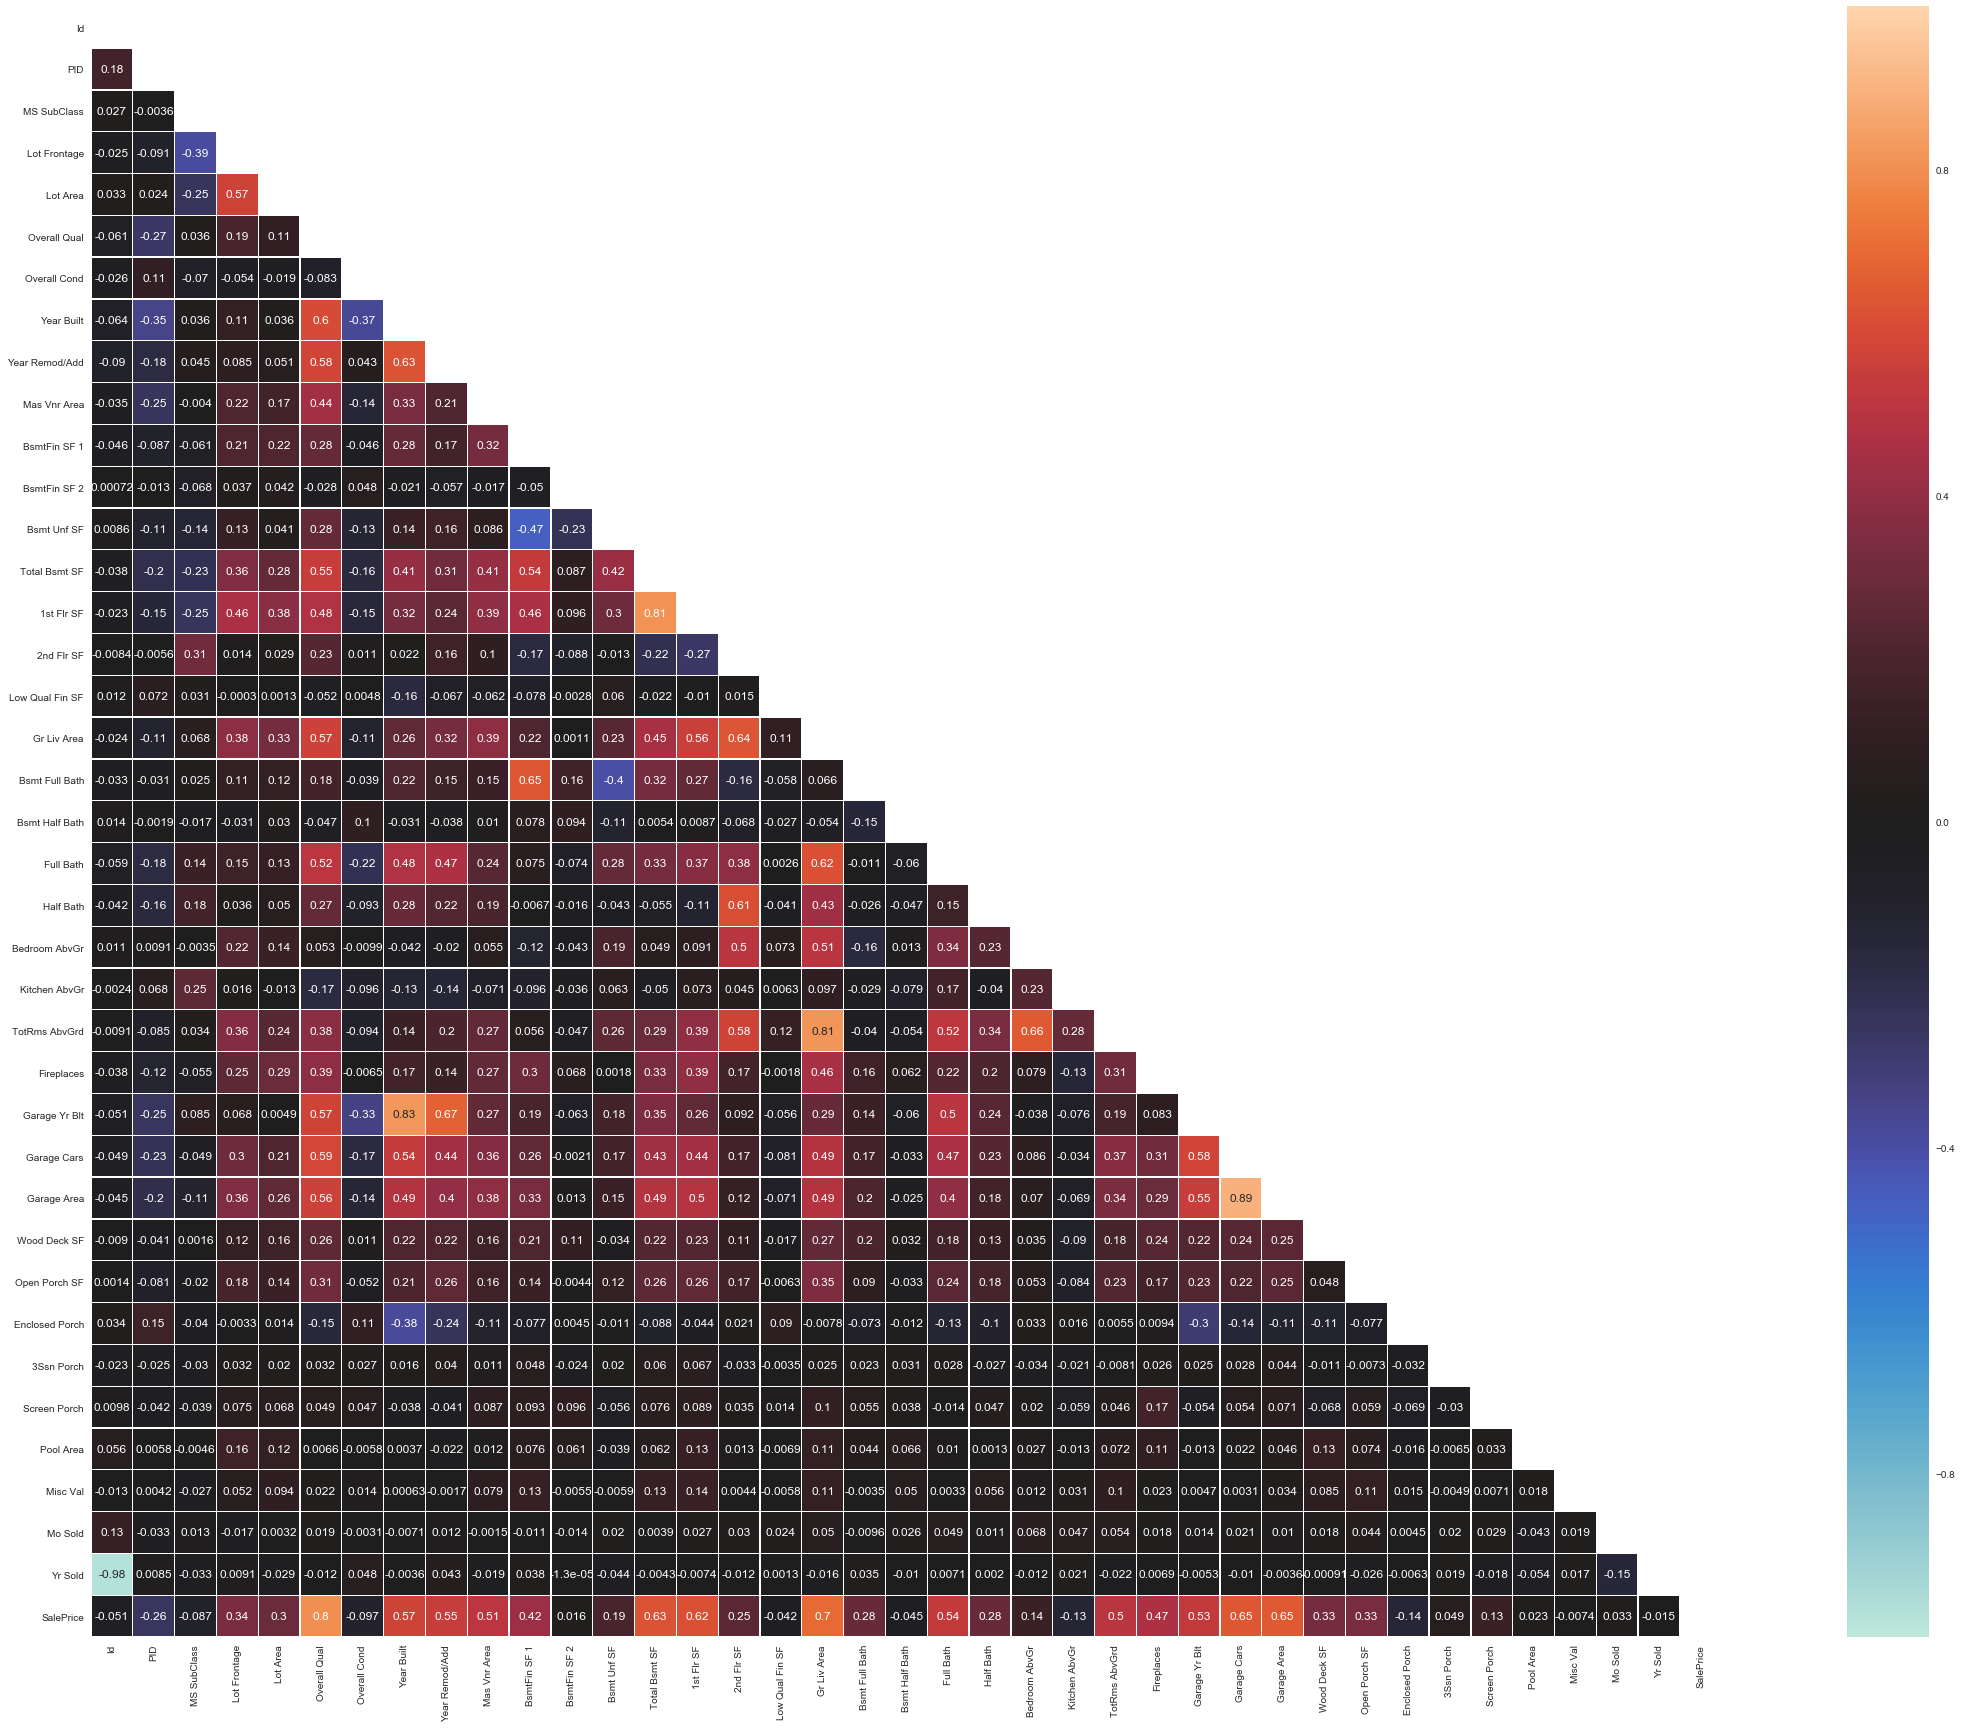

In [5]:
sns.set(style="white")

corr = train_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(45, 30))

sns.heatmap(corr, annot = True, mask=mask, vmin = -1, vmax= 1, center=0,
            square=True, linewidths=.3);

----------
# Training Data - EDA:

### Training Dataset - Missing Values

#### Below is a table displaying the total Missing Values per column:

In [6]:
total_nulls = train_df.isnull().sum().sort_values(ascending=False)[:26]
total_nulls_df = pd.DataFrame(total_nulls)
total_nulls_df.rename(columns = {0 : 'Total Null Values'}, inplace = True)
total_nulls_df

,Total Null Values
Pool QC,2042
Misc Feature,1986
Alley,1911
Fence,1651
Fireplace Qu,1000
Lot Frontage,330
Garage Finish,114
Garage Cond,114
Garage Qual,114
Garage Yr Blt,114


### Training Dataset - Percentage of Missing Values

#### The table below shows the percentage of missing values per column:

In [7]:
percentage_missing = (train_df.isnull().sum().sort_values(ascending = False)[:26] / train_df.isnull().count()).sort_values(ascending = False)[:26]
percentage_missing_df = pd.DataFrame(percentage_missing)
percentage_missing_df.rename(columns = {0 : 'Percentage of Missing Values'}, inplace = True)
percentage_missing_df

,Percentage of Missing Values
Pool QC,0.995612
Misc Feature,0.968308
Alley,0.931741
Fence,0.804973
Fireplace Qu,0.487567
Lot Frontage,0.160897
Garage Yr Blt,0.055583
Garage Qual,0.055583
Garage Finish,0.055583
Garage Cond,0.055583


### Dropping Missing data over 30%:

- #### The following columns have been dropped because they are missing more than 30% of their respective values. These columns do not seem to play an intergral role in appraising the value of the home. Also, any replacements may skew the data from the column. 

In [8]:
train_df.drop('Pool QC', axis = 1, inplace = True)

In [9]:
train_df.drop('Misc Feature', axis = 1, inplace = True)

In [10]:
train_df.drop('Alley', axis=1, inplace = True)

In [11]:
train_df.drop('Fence', axis = 1, inplace = True)

In [12]:
train_df.drop('Fireplace Qu', axis = 1, inplace = True)

### Replacing Null Values/Missing Data:

- `Lot Frontage`: the missing values have been assigned the mean value of the column since it is a continous value. 


- `Garage Finish`, `Garage Cond`, `Garage Qual`, & `Garage Type`: the missing values have been inputted as "NA" since the home may lack a garage. 


- `Garage Yr Blt`: the missing values have been assigned the mean value of the column since it is a continous value. 


- `Bsmt Exposure`, `BsmtFin Type 2`, `BsmtFin Type 1`, `Bsmt Cond`, & `Bsmt Qual`: the missing values for these columns have been inputted as "NA" since the home may lack a basement. 


- `Mas Vnr Type`: the missing values have been inputted as "None"; the house may lack any type of Masonry veneer.


- `Mas Vnr Area`: the missing values have been assigned the mean value of the column since it is a continous value. 


- `Bsmt Half Bath` & `Bsmt Full Bath`: the missing values have been inputted as the mode ("0") since most homes did not have any type of bathroom in the basement.


- `Garage Cars`: the missing value has been inputted as the mode ("2") since most homes averaged a two-car garage.


- `Garage Area`: the missing value has been assigned the mean value of the column since it is a continous value. 


- `Bsmt Unf SF`: the missing values has been assigned the mean value of the column since it is a continous value. 


- `BsmtFin SF 2`: the missing value has been assigned the mean value of the column since it is a continous value. 


- `Total Bsmt SF`: the missing value has been assigned the mean value of the column since it is a continous value. 


- `BsmtFin SF 1`: the missing value has been assigned the mean value of the column since it is a continous value. 


In [13]:
train_df.fillna({
    'Lot Frontage' : train_df['Lot Frontage'].mean(),
    'Garage Finish' : 'NA',  
    'Garage Cond' : 'NA',
    'Garage Qual' : 'NA',
    'Garage Type' : train_df['Garage Type'].mode()[0],
    'Garage Yr Blt' : train_df['Garage Yr Blt'].mode()[0], 
    'Bsmt Exposure' : 'NA',
    'BsmtFin Type 2' : 'NA',
    'BsmtFin Type 1' : 'NA', 
    'Bsmt Cond' : 'NA',
    'Bsmt Qual' : 'NA', 
    'Mas Vnr Type' : 'None',
    'Mas Vnr Area' : train_df['Mas Vnr Area'].mean(),
    'Bsmt Half Bath' : train_df['Bsmt Half Bath'].mode()[0], #0.0 because most homes don't have half bathrooms in bsmt
    'Bsmt Full Bath': train_df['Bsmt Full Bath'].mode()[0], #0.0 because most homes don't have full bathrooms in bsmt
    'Garage Cars' : train_df['Garage Cars'].mode()[0], # 2 is typical
    'Garage Area' : train_df['Garage Area'].mean(),
    'Bsmt Unf SF' : train_df['Bsmt Unf SF'].mean(),
    'BsmtFin SF 2' : train_df['BsmtFin SF 2'].mean(),
    'Total Bsmt SF' : train_df['Total Bsmt SF'].mean(),
    'BsmtFin SF 1' : train_df['BsmtFin SF 1'].mean(),
}, inplace = True)

In [14]:
train_df.isnull().sum().sort_values(ascending = False).head()

SalePrice         0
Exter Qual        0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
dtype: int64

### Creating Dummy Variables

- #### Below, dummy variables were created for all qualitative data. 

In [15]:
obj_cols = list(train_df.select_dtypes(include = 'object'))
train_df = pd.get_dummies(train_df, columns=obj_cols)

In [16]:
train_df.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Paved Drive_Y,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,69.0552,13517,6,8,1976,2005,289.0,...,1,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0000,11492,7,5,1996,1997,132.0,...,1,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.0000,7922,5,7,1953,2007,0.0,...,1,0,0,0,0,0,0,0,0,1
3,318,916386060,60,73.0000,9802,5,5,2006,2007,0.0,...,1,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.0000,14235,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,0,0,1


--------
## Training Data Visualized

### Sales Price Distribution:

- #### The histogram below shows a positive distribution for `SalePrice`. 
    - The *mean* is approximately: 181,469 USD.
    - The *mode* is 130,000 USD.

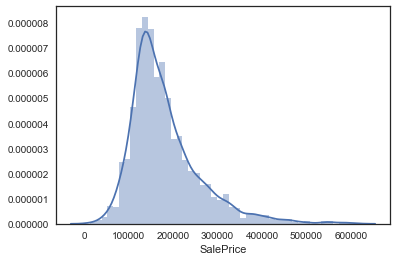

In [17]:
sns.distplot(train_df['SalePrice']);

### Strong Correlation:

#### Below are the columns with the strongest correlation to `SalePrice`.
- The *correlation* displayed are for columns higher than 0.5%.

In [18]:
sp_corr = pd.DataFrame(train_df.corr()['SalePrice'])

In [19]:
sp_corr = sp_corr[sp_corr.SalePrice > 0.5]

In [20]:
sp_corr = sp_corr['SalePrice'].sort_values(ascending = False)

In [21]:
pd.DataFrame(sp_corr)

,SalePrice
SalePrice,1.000000
Overall Qual,0.800207
Gr Liv Area,0.697038
Garage Area,0.650246
Garage Cars,0.648128
Total Bsmt SF,0.628668
1st Flr SF,0.618486
Bsmt Qual_Ex,0.586497
Year Built,0.571849
Kitchen Qual_Ex,0.551284


### Visualizing the Strong Correlations:

#### The graphs below are displaying the only the strong correlations to  `SalePrice` .

In [22]:
#sns.pairplot(train_df, x_vars = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', 
#            '1st Flr SF', 'Bsmt Qual_Ex', 'Kitchen Qual_Ex', 'Year Built', 'Year Remod/Add', 
#            'Full Bath', 'Foundation_PConc', 'Mas Vnr Area', 'TotRms AbvGrd'], y_vars = 'SalePrice', size = 10, aspect = 0.7, kind = 'reg');

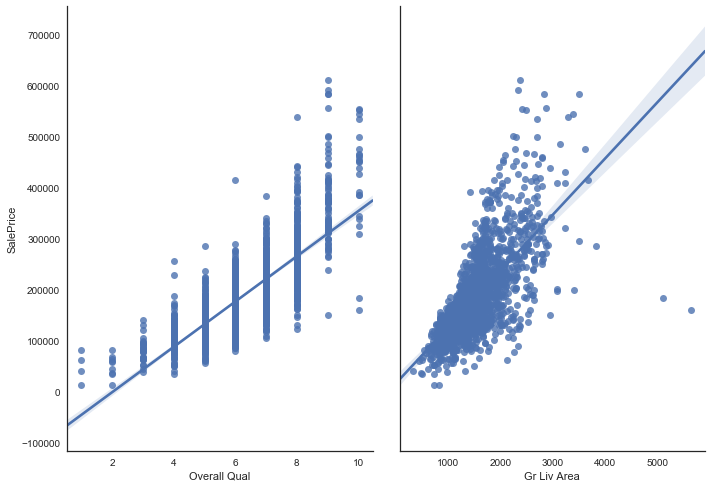

In [23]:
sns.pairplot(train_df, x_vars = ['Overall Qual', 'Gr Liv Area'], y_vars = 'SalePrice', size = 7, aspect = 0.7, kind = 'reg');

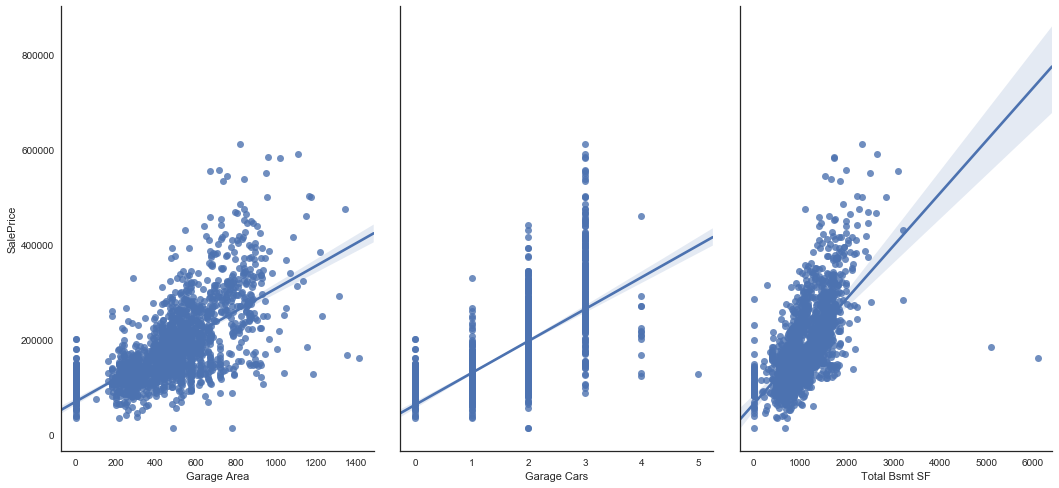

In [24]:
sns.pairplot(train_df, x_vars = ['Garage Area', 'Garage Cars', 'Total Bsmt SF'], y_vars = 'SalePrice', size = 7, aspect = 0.7, kind = 'reg');

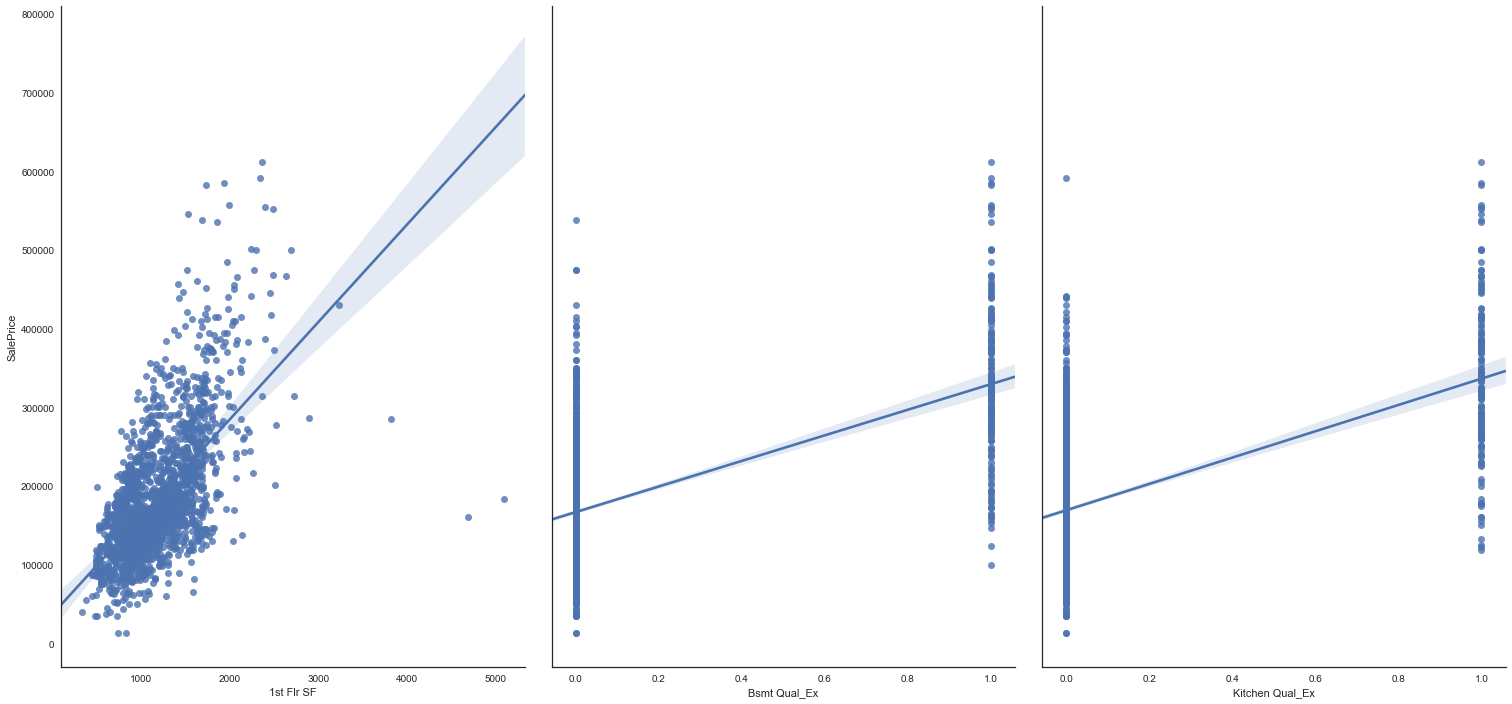

In [25]:
sns.pairplot(train_df, x_vars = ['1st Flr SF', 'Bsmt Qual_Ex', 'Kitchen Qual_Ex'], y_vars = 'SalePrice', size = 10, aspect = 0.7, kind = 'reg');

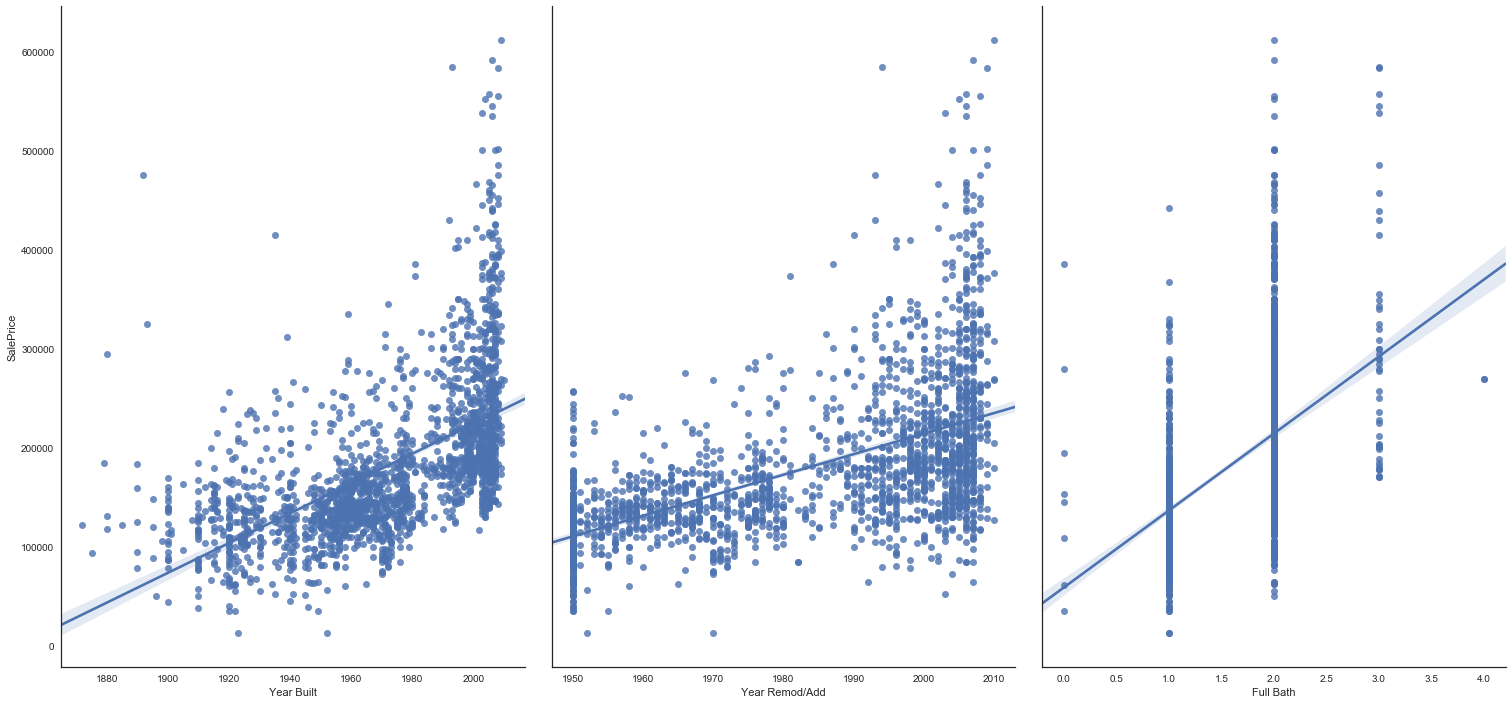

In [26]:
sns.pairplot(train_df, x_vars = ['Year Built', 'Year Remod/Add', 'Full Bath'], y_vars = 'SalePrice', size = 10, aspect = 0.7, kind = 'reg');

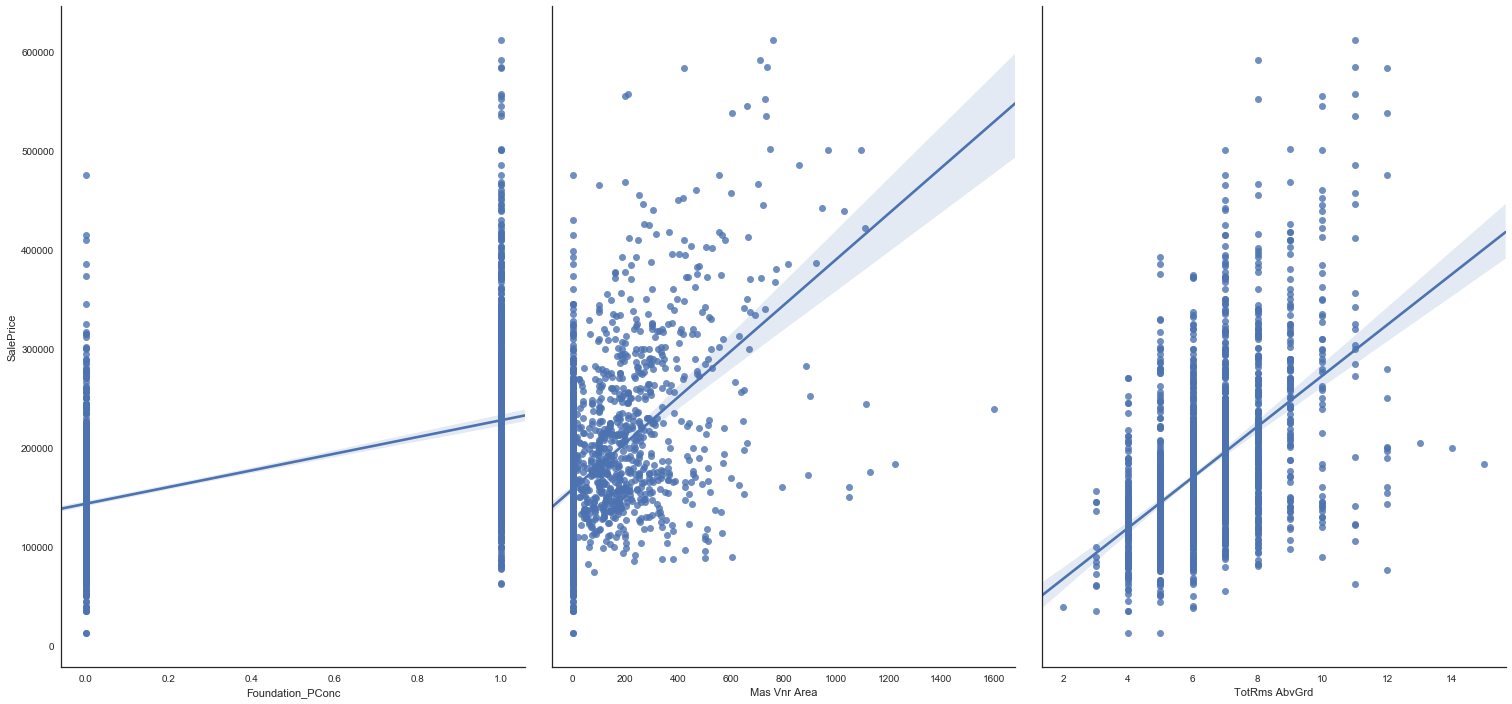

In [27]:
sns.pairplot(train_df, x_vars = ['Foundation_PConc', 'Mas Vnr Area', 'TotRms AbvGrd'], y_vars = 'SalePrice', size = 10, aspect = 0.7, kind = 'reg');

--------

--------

## Test Data - EDA:


### Test Dataset - Missing Values

#### Below is a table displaying the total Missing Values per column:

In [28]:
total_test_nulls = test_df.isnull().sum().sort_values(ascending=False)[:19]
total_test_nulls = pd.DataFrame(total_test_nulls)
total_test_nulls.rename(columns = {0 : 'Test: Missing Data'}, inplace = True)
total_test_nulls

,Test: Missing Data
Pool QC,875
Misc Feature,838
Alley,821
Fence,707
Fireplace Qu,422
Lot Frontage,160
Garage Cond,45
Garage Qual,45
Garage Yr Blt,45
Garage Finish,45


### Test Dataset - Percentage of Missing Values

#### Below is a table displaying the Percentage of Missing Values per column:

In [29]:
test_null_percentage = (test_df.isnull().sum().sort_values(ascending = False)[:19] / test_df.isnull().count()).sort_values(ascending = False)[:19]
test_null_percentage_df = pd.DataFrame(test_null_percentage)
test_null_percentage_df.rename(columns = {0: 'Percentage of Missing Values'}, inplace = True)
test_null_percentage_df

,Percentage of Missing Values
Pool QC,0.995449
Misc Feature,0.953356
Alley,0.934016
Fence,0.804323
Fireplace Qu,0.480091
Lot Frontage,0.182025
Garage Yr Blt,0.051195
Garage Qual,0.051195
Garage Finish,0.051195
Garage Cond,0.051195


### Test Data: Dropping Test Data greater than 30%
- #### The following columns have been dropped because they are missing more than 30% of their respective values. These columns do not seem to play an intergral role in appraising the value of the home. Also, any replacements may skew the data from the column. 

In [30]:
test_df.drop('Pool QC', axis = 1, inplace = True)

In [31]:
test_df.drop('Misc Feature', axis = 1, inplace = True)

In [32]:
test_df.drop('Alley', axis = 1, inplace = True)

In [33]:
test_df.drop('Fence', axis = 1, inplace = True)

In [34]:
test_df.drop('Fireplace Qu', axis = 1, inplace = True)

### Test Dataset: Replacing Null Values/Missing Data:

- `Lot Frontage`: the missing values have been assigned the mean value of the column since it is a continous value. 


- `Garage Yr Blt`: the missing values have been assigned the mean value of the column since it is a continous value. 


- `Garage Cond`, `Garage Finish`, `Garage Qual`, & `Garage Type`: the missing values have been inputted as "NA" since the home may lack a garage. 


- `BsmtFin Type 2`, `BsmtFin Type 1`, `Bsmt Exposure`,  `Bsmt Cond`, & `Bsmt Qual`: the missing values have been inputted as "NA" since the home may lack a basement. 


- `Mas Vnr Type`: the missing value has been inputted as "None"; the house may lack any type of Masonry veneer.


- `Mas Vnr Area`: the missing value has been assigned the mean value of the column since it is a continous value. 


- `Electrical`: Standard Circuit Breakers & Romex was inputted for the missing value since the mode seemed reseanable in this instance.

In [35]:
test_df['Electrical'].value_counts()

SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

In [36]:
fill_dict = {
    'Lot Frontage' : test_df['Lot Frontage'].mean(),
    'Garage Yr Blt' : test_df['Garage Yr Blt'].mean(),
    'Garage Cond' : 'NA',
    'Garage Finish' : 'NA',
    'Garage Qual' : 'NA',
    'Garage Type' : 'NA',
    'BsmtFin Type 2' : 'NA',
    'BsmtFin Type 1' : 'NA',
    'Bsmt Exposure' : 'NA',
    'Bsmt Cond' : 'NA',
    'Bsmt Qual' : 'NA',
    'Mas Vnr Area' : test_df['Mas Vnr Area'].mean(),
    'Mas Vnr Type' : 'None',
    'Electrical' : test_df['Electrical'].mode()[0],
}

for key, value in fill_dict.items():
    test_df[[key]] = test_df[[key]].fillna(value=value)

In [37]:
test_df.isnull().sum().sort_values(ascending = False).head()

Sale Type         0
Overall Cond      0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
dtype: int64

### Test Dataset - Creating Dummy Variables


- #### Below, dummy variables were created for all qualitative data. 

In [38]:
test_obj_cols = list(test_df.select_dtypes(include = 'object'))
test_df = pd.get_dummies(test_df, columns = test_obj_cols)



In [39]:
test_df.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,902301120,190,69.000000,9142,6,8,1910,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,69.630042,9662,5,4,1977,1977,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,58.000000,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,1,0,0,0
3,1989,902207150,30,60.000000,8520,5,6,1923,2006,0.0,...,0,0,0,0,0,0,0,0,0,1
4,625,535105100,20,69.630042,9500,6,5,1963,1963,247.0,...,0,0,0,0,0,0,0,0,0,1


-----------

-------
## Scikit Learn Models
-------

## Simple Linear Regression:

### The model below uses `train_test_split` to train/test, fit, and score the training dataset.

**Interpretation:**

- $R^2$ Score: measures the proportion of the *variability* of $Y$ and in this particular model, the score value was approximately 87% accurate.


- $RSME$: measures the *standard deviation* of the residuals, or the noise of the model, and this model scored approximately 27,345.68. Therefore, the residuals are moderately close to the regression line. 

In [40]:
features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', 
            '1st Flr SF', 'Bsmt Qual_Ex', 'Kitchen Qual_Ex', 'Year Built', 'Year Remod/Add', 
            'Full Bath', 'Foundation_PConc', 'Mas Vnr Area', 'TotRms AbvGrd']
X = train_df[features]
y = train_df['SalePrice']

In [102]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state = 34)

In [103]:
print('X_train:', X_train.shape)
print('X_validation:', X_holdout.shape)
print('y_train:', y_train.shape)
print('y_validation:', y_holdout.shape)

X_train: (1435, 14)
X_validation: (616, 14)
y_train: (1435,)
y_validation: (616,)


In [104]:
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_holdout_scaled = ss.transform(X_holdout)

In [105]:
slr = LinearRegression()
slr.fit(X_train_scaled, y_train)
slr.score(X_train_scaled, y_train)

0.8186701119597773

#### $R^2$ Score:

In [106]:
slr.score(X_holdout_scaled, y_holdout)

0.859188850365186

#### Mean Squared Error:

In [46]:
predictions = slr.predict(X_holdout_scaled)

In [47]:
mean_squared_error(y_holdout, predictions)

747786406.9609903

#### Root Mean Squared Error:

In [48]:
np.sqrt(mean_squared_error(y_holdout, predictions))

27345.68351606868

#### Plotting the Linear Regression Model

In [49]:
#X_scaled = pd.DataFrame(X_train_scaled, columns = features)
#X_scaled.head() #scaled to the same units

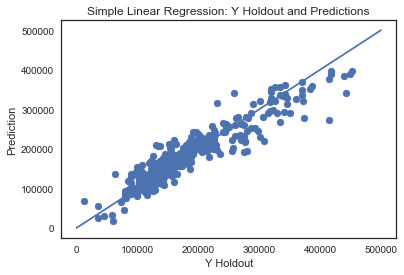

In [50]:
plt.scatter(y_holdout, predictions)
plt.title("Simple Linear Regression: Y Holdout and Predictions")
plt.xlabel('Y Holdout')
plt.ylabel('Prediction')
plt.plot([0, 500000],[0, 500000]);

---------

## Regression with a Ridge Penalty:

### The model below uses `RidgeCV` to cross-validate, fit, and score the training dataset.

**Interpretation:**

- $R^2$ Score: measures the proportion of the *variability* of $Y$ and in this particular model, the score value was approximately 87% accurate.


- $RSME$: measures the *standard deviation* of the residuals, or the noise of the model, and this model scored approximately 28,082.91. Therefore, the residuals are moderately close to the regression line. 

In [51]:
ridge_alphas = np.logspace(0, 5, 201)

ridge = RidgeCV(alphas=ridge_alphas,  
                        store_cv_values = True)

ridge.fit(X_train_scaled, y_train)
ridge.score(X_train_scaled, y_train)

0.8174991260181138

#### Optimal Alpha Value with Ridge:

In [52]:
optimal_ridge = ridge.alpha_
optimal_ridge

177.82794100389228

#### $R^2$ Score with Ridge:

In [53]:
ridge.score(X_holdout_scaled, y_holdout)

0.8672645053299141

#### Mean Squared Error with Ridge:

In [54]:
pred = ridge.predict(X_holdout_scaled)

In [55]:
mean_squared_error(y_holdout, pred)

788649998.168203

#### Root Mean Squared Error with Ridge:

In [56]:
np.sqrt(mean_squared_error(y_holdout, pred))

28082.912921707444

#### Plotting the Linear Regression with a Ridge Penalty

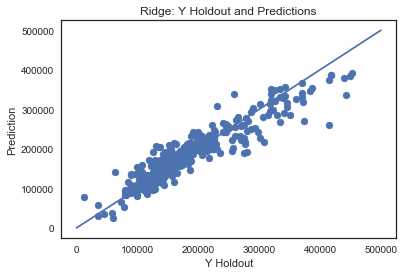

In [57]:
plt.scatter(y_holdout, pred)
plt.title("Ridge: Y Holdout and Predictions")
plt.xlabel('Y Holdout')
plt.ylabel('Prediction')
plt.plot([0, 500000],[0, 500000]);

---------


### The model below uses `LassoCV` to cross-validate, fit, and score the training dataset.

**Interpretation:**

- $R^2$ Score: measures the proportion of the *variability* of $Y$ and in this particular model, the score value was approximately 87% accurate.


- $RSME$: measures the *standard deviation* of the residuals, or the noise of the model, and this model scored approximately 28,082.91. Therefore, the residuals are moderately close to the regression line. 

In [58]:
lasso_alphas = np.logspace(0, 5, 201)

lasso = LassoCV(alphas = lasso_alphas,  
                        cv = 5)

lasso.fit(X_train_scaled, y_train)
lasso.score(X_train_scaled, y_train)

0.8187923315702613

#### Optimal Alpha Value with Lasso:

In [59]:
lasso_optimal_alpha = lasso.alpha_
lasso_optimal_alpha

1000.0

#### $R^2$ Score with Lasso:

In [60]:
lasso.score(X_holdout_scaled, y_holdout)

0.8728895933406688

#### Mean Squared Error with Lasso:

In [61]:
y_pred = lasso.predict(X_holdout_scaled)

In [62]:
mean_squared_error(y_holdout, y_pred)

755228450.5979469

#### Root Mean Squared Error with Lasso:

In [63]:
np.sqrt(mean_squared_error(y_holdout, y_pred))

27481.42009791246

#### Plotting the Linear Regression with a Lasso Penalty:

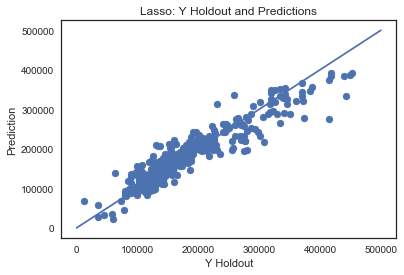

In [64]:
plt.scatter(y_holdout, y_pred)
plt.title("Lasso: Y Holdout and Predictions")
plt.xlabel('Y Holdout')
plt.ylabel('Prediction')
plt.plot([0,500000], [0,500000]);

## Conclusions from the models above:

#### The $R^2$ scores from the Linear, Ridge, and Lasso models above do not vary due to the limited amount of features being used. Using a limited amount of strongly correlated features will accurately predict the mean price.

------

-----
# Feature Engineering:

## Eliminating Outliers Outside 3 Standard Deviations of the Mean:

In [65]:
df = pd.DataFrame(train_df)
df[np.abs(train_df - train_df.mean()) <= (3 * train_df.std())]
df[~(np.abs(train_df - train_df.mean()) > (3 * train_df.std()))]
df.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Paved Drive_Y,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,69.0552,13517,6,8,1976,2005,289.0,...,1,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0000,11492,7,5,1996,1997,132.0,...,1,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.0000,7922,5,7,1953,2007,0.0,...,1,0,0,0,0,0,0,0,0,1
3,318,916386060,60,73.0000,9802,5,5,2006,2007,0.0,...,1,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.0000,14235,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,0,0,1


In [66]:
df.isnull().sum().sort_values(ascending = False).head()

Sale Type_WD            0
Condition 1_Artery      0
Neighborhood_Sawyer     0
Neighborhood_SawyerW    0
Neighborhood_Somerst    0
dtype: int64

In [67]:
df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1.486000e+03,2198.0,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,5.354532e+08,907180080.0,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,5.000000e+01,70.0,190.0
Lot Frontage,2051.0,6.905520e+01,2.130636e+01,21.0,60.0,6.905520e+01,78.0,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9.430000e+03,11513.5,159000.0


# Modeling using a Pipeline:

### The models below use a `Pipeline` on all features after eliminating outliers.


----------
## Simple Linear Regression:
----
**Interpretation:**

- $R^2$ Score: measures the proportion of the *variability* of $Y$. However, this particular model performed particularly awful--with a negative score--due to to all the features and would deem it unreliable to predict the value of a home.


- $RSME$: measures the *standard deviation* of the residuals--the noise of the model--and this model scored approximately 195,616,971,100,734.12. Therefore, the residuals are **absurdly** high/noisey and far from the regression line. 

In [68]:
X_train, X_holdout, y_train, y_holdout = train_test_split(df.drop('SalePrice', 1), 
                                                          df.SalePrice, 
                                                          test_size=0.2, 
                                                          random_state = 42)

In [69]:
ss = StandardScaler()
slr = LinearRegression()

In [70]:
pipe = Pipeline([
    ('ss', ss),
    ('slr', slr),
])

In [71]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('slr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

#### $R^2$ Score:

In [72]:
pipe.score(X_holdout, y_holdout)

-6.44044426411663e+18

#### Mean Squared Error:

In [73]:
pred = pipe.predict(X_holdout)
mean_squared_error(y_holdout, pred)

3.826599938262545e+28

#### Root Mean Squared Error:

In [74]:
np.sqrt(mean_squared_error(y_holdout, pred))

195616971100734.12

#### Plotting the Linear Regression:

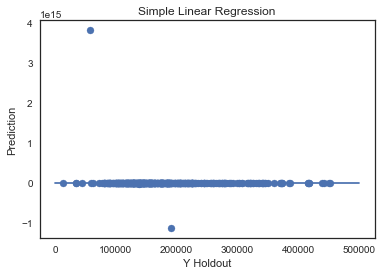

In [75]:
plt.scatter(y_holdout, pred)
plt.title("Simple Linear Regression")
plt.xlabel('Y Holdout')
plt.ylabel('Prediction')
plt.plot([0,500000], [0,500000]);

## Using `Pipeline` with a Ridge Penalty
-------
**Interpretation:**

- $R^2$ Score: measures the proportion of the *variability* of $Y$. However, this particular model performed particularly well with approximately 92% accuracy and would deem the model quite reliable to predict the value of a home.


- $RSME$: measures the *standard deviation* of the residuals--the noise of the model--and this model scored approximately 21,861.33. Therefore, the residuals quite close from the regression line. 

In [76]:
ss = StandardScaler()
ridge = RidgeCV()

In [77]:
pipe2 = Pipeline([
    ('ss', ss),
    ('ridge', ridge),
])

In [78]:
pipe2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False))])

#### $R^2$ Score with Ridge:

In [79]:
pipe2.score(X_holdout, y_holdout)

0.9195629702374211

#### Mean Squared Error with Ridge:

In [80]:
r_pred = pipe2.predict(X_holdout)
mean_squared_error(y_holdout, r_pred)

477917858.6148743

#### Root Mean Squared Error with Ridge:

In [81]:
np.sqrt(mean_squared_error(y_holdout, r_pred))

21861.332498612115

#### Plotting the Linear Regression with a Ridge Penalty:

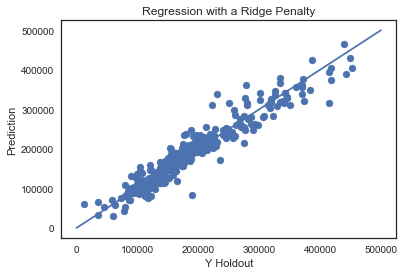

In [82]:
plt.scatter(y_holdout, r_pred)
plt.title("Regression with a Ridge Penalty")
plt.xlabel('Y Holdout')
plt.ylabel('Prediction')
plt.plot([0,500000], [0,500000]);

## Using `Pipeline` with a Lasso Penalty
----
**Interpretation:**

- $R^2$ Score: measures the proportion of the *variability* of $Y$. However, this particular model performed particularly well with approximately 92% accuracy and would deem the model quite reliable to predict the value of a home.


- $RSME$: measures the *standard deviation* of the residuals--the noise of the model--and this model scored approximately 21,379.24. Therefore, the residuals quite close from the regression line. 

In [83]:
ss = StandardScaler()
lasso = LassoCV()

In [84]:
pipe3 = Pipeline([
    ('ss', ss),
    ('lasso', lasso),
])

In [85]:
pipe3.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False))])

#### $R^2$ Score with Lasso:

In [86]:
pipe3.score(X_holdout, y_holdout)

0.9230714302684299

#### Mean Squared Error:

In [87]:
l_pred = pipe3.predict(X_holdout)
mean_squared_error(y_holdout, l_pred)

457072288.9810289

#### Root Mean Squared Error:

In [88]:
np.sqrt(mean_squared_error(y_holdout, l_pred))

21379.249027527345

#### Plotting the Linear Regression with a Lasso Penalty:

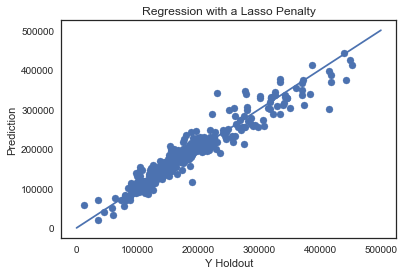

In [89]:
plt.scatter(y_holdout, l_pred)
plt.title("Regression with a Lasso Penalty")
plt.xlabel('Y Holdout')
plt.ylabel('Prediction')
plt.plot([0,500000], [0,500000]);

## Using `Pipeline` with an Elastic Net Penalty
--------
**Interpretation:**

- $R^2$ Score: measures the proportion of the *variability* of $Y$. However, this particular model performed particularly poor with approximately 30% accuracy and would deem the model quite unreliable to predict the value of a home.


- $RSME$: measures the *standard deviation* of the residuals--the noise of the model--and this model scored approximately 64,257.09. Therefore, the residuals are particularly far close from the regression line. 

In [90]:
ss = StandardScaler()
elas = ElasticNetCV()

In [91]:
pipe4 = Pipeline([
    ('ss', ss),
    ('elas', elas),
])

In [92]:
pipe4.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('elas', ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0))])

#### $R^2$ Score using Elastic Net:

In [93]:
pipe4.score(X_holdout, y_holdout)

0.3050638385573642

#### Mean Squared Error Using Elastic Net:

In [94]:
e_pred = pipe4.predict(X_holdout)
mean_squared_error(y_holdout, e_pred)

4128973970.458762

#### Root Mean Squared Error Using Elastic Net:

In [95]:
np.sqrt(mean_squared_error(y_holdout, e_pred))

64257.09276382462

#### Plotting the Linear Regression with an Elastic Net Penalty:

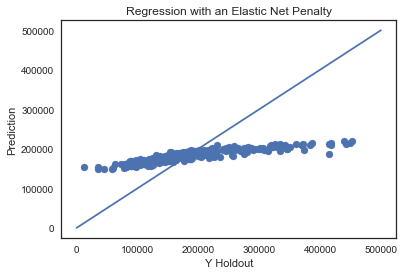

In [96]:
plt.scatter(y_holdout, e_pred)
plt.title("Regression with an Elastic Net Penalty")
plt.xlabel('Y Holdout')
plt.ylabel('Prediction')
plt.plot([0,500000], [0,500000]);

--------
## Gridsearch CV:
---------

In [97]:
ridge_params = {
    'ridge__cv': [5, 3, 2],
    'ridge__normalize': [True, False],
}
 
gs = GridSearchCV(pipe2, param_grid = ridge_params,) 
gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.8183520442854625
{'ridge__cv': 5, 'ridge__normalize': False}
